In [1]:
from file_hopping import Txt_hop
%matplotlib inline
from graph_hop import Graph_hop
import numpy as np

# 6bs_hop

In [2]:
# directory name
dir_name = "P5bp_3bs_hop/6"
# molecule name is a number in these experimets
number = "6"

In [3]:
file = Txt_hop(dir_name, number, first_time_molecule=False)
dataFrame = file.bricolage()

In [4]:
dataFrame

,X_force,Z_force,lambda,Y_force,time(sec)
0,-0.8744,0.3450,241.28955,4.6226,11229.69043
1,-0.5743,0.2851,241.33320,4.8313,11229.68945
2,-0.0089,0.4533,241.52090,4.8414,11229.69141
3,-0.6267,0.1575,242.01415,4.9121,11229.69141
4,-0.8256,-0.0223,241.46580,4.8448,11229.69238
...,...,...,...,...,...
71653,-0.4958,-0.1499,202.69990,4.3768,11352.15137
71654,-0.5394,-0.0649,202.86730,4.1580,11352.15137
71655,-0.1904,-0.0610,202.75605,4.1714,11352.15234
71656,-0.8256,-0.2389,202.29785,4.3128,11352.15332


In [5]:
forces_average = []
forces_average_std = []
w_U = []
w_N = []
sigma_w_U = []
sigma_w_N = []
def mean(mu1, mu2):
    return (mu1+mu2)/2

def err_prop_mean(sigma1, sigma2):
    return np.sqrt(sigma1**2+sigma2**2)/2

# File 1

f media vale = 4.8448521716439705, con deviazione standard = 0.22779099391959315


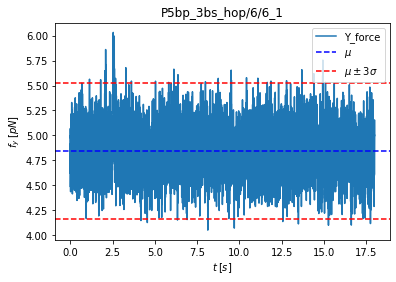

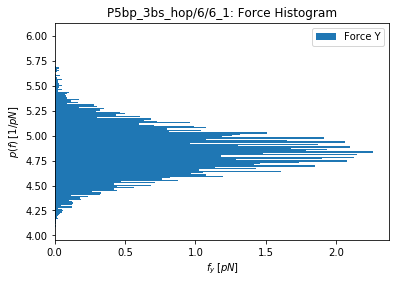

In [6]:
grafici = Graph_hop(dir_name, number, 1)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

## Suspicious data: no hopping events observed

In [7]:
# prova = [2.2, 4., 0.3, 0.3, 3.5, 0.1]
# fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)

In [8]:
# forces_average.append(mean(fitting_par[1], fitting_par[4]))
# forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
# w_U.append(prob[0])
# w_N.append(prob[1])
# sigma_w_U.append(err_prob[0])
# sigma_w_N.append(err_prob[1])

In [9]:
# grafici.subplots(fitting_par)

In [10]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,-0.8744,0.3450,241.28955,4.6226,0.00000
1,-0.5743,0.2851,241.33320,4.8313,-0.00098
2,-0.0089,0.4533,241.52090,4.8414,0.00098
3,-0.6267,0.1575,242.01415,4.9121,0.00098
4,-0.8256,-0.0223,241.46580,4.8448,0.00195
...,...,...,...,...,...
17240,-0.8204,-0.1673,240.12860,4.9272,17.98730
17241,-0.4225,-0.2572,239.97035,5.1545,17.98730
17242,-0.7785,-0.1151,240.40335,5.0030,17.98926
17243,-0.6162,-0.0542,240.14115,4.9676,17.98926


# File 2

f media vale = 4.506451620242702, con deviazione standard = 0.309032172391786


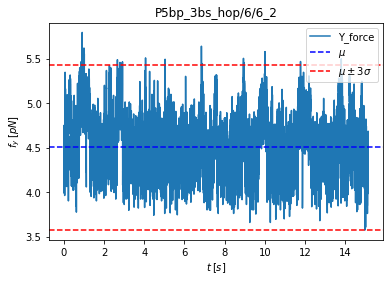

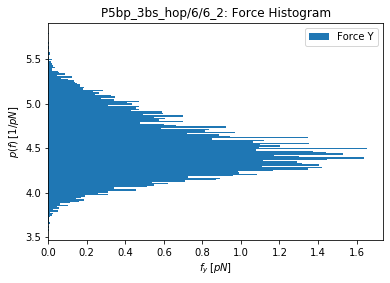

In [11]:
grafici = Graph_hop(dir_name, number, 2)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

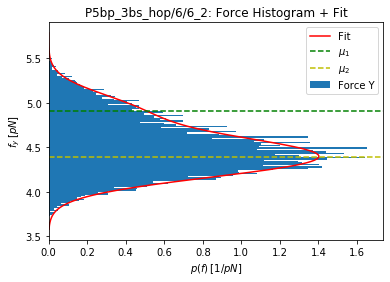

c_1 = 0.4145591201806894, mu_1 = 4.904744977311082, sigma_1 = 0.2134410390577008
c_2 = 1.3790745566795153, mu_2 = 4.389683443385157, sigma_2 = 0.22490381636583368
sigma_c_1 = 0.03990747538787087, sigma_mu_1 = 0.05232663086781621, sigma_sigma_1 = 0.038221568547741204
sigma_c_2 = 0.05067349433795412, sigma_mu_2 = 0.01661522239617118, sigma_sigma_2 = 0.00937097824001445
w_U = 0.7774536470241958, sigma_w_U = 0.012321716644840462
w_N = 0.2217963191897743, sigma_w_N = 0.15806252505274213


In [12]:
prova = [0.4, 4.9, 0.1, 1.4, 4.3, 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [13]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

La molecola sta 4195 sec nello stato nativo e 10309 sec nello stato unfolded


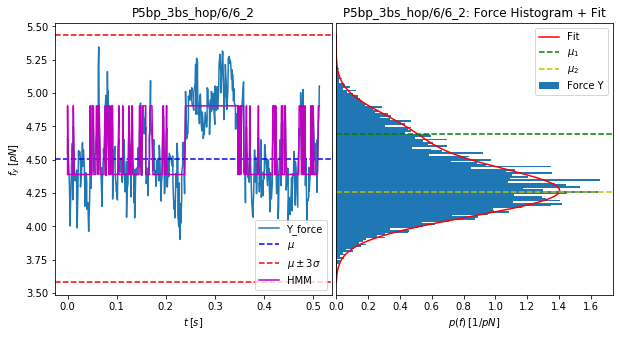

(4195, 10309)

In [14]:
grafici.subplots(fitting_par, True, 500)

In [15]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,-0.0037,0.2706,229.50695,4.5485,0.00000
1,-0.6162,0.2010,229.42095,4.6545,0.00000
2,-0.1276,0.2638,229.49880,4.6226,0.00098
3,-1.0001,0.5731,229.58760,4.2926,0.00391
4,-1.1746,0.4958,229.85130,4.1176,0.00488
...,...,...,...,...,...
14499,-0.2288,-0.2630,230.03470,4.5788,15.13477
14500,-0.8465,-0.3935,229.86000,4.6848,15.13574
14501,-0.5638,0.0038,230.22480,4.4879,15.13574
14502,-0.7052,-0.1267,229.98415,4.5384,15.13672


# File 3

f media vale = 4.175957814574172, con deviazione standard = 0.3088069459084191


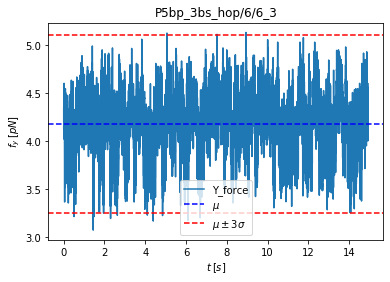

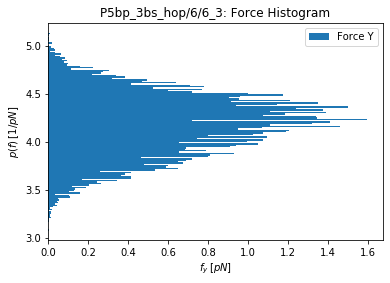

In [16]:
grafici = Graph_hop(dir_name, number, 3)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

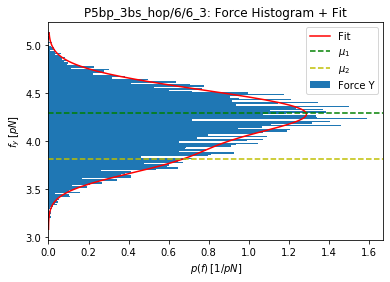

c_1 = 1.268561038915209, mu_1 = 4.294078984503652, sigma_1 = 0.23886306493198656
c_2 = 0.5052732028626481, mu_2 = 3.812619513853296, sigma_2 = 0.1874652174037238
sigma_c_1 = 0.036951423300991555, sigma_mu_1 = 0.023762237899647935, sigma_sigma_1 = 0.01777460974478756
sigma_c_2 = 0.0941197690446961, sigma_mu_2 = 0.04378899143658267, sigma_sigma_2 = 0.02332197089902249
w_U = 0.23743071485832415, sigma_w_U = 0.1701359095420373
w_N = 0.7595393937781876, sigma_w_N = 0.018973415525967915


In [17]:
prova = [1.2, 4.5, 0.1, 1.2, 4.0, 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [18]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

La molecola sta 9738 sec nello stato nativo e 4575 sec nello stato unfolded


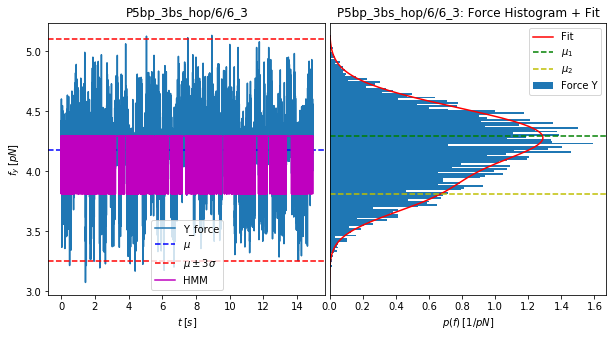

(9738, 4575)

In [19]:
grafici.subplots(fitting_par)

In [20]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,-0.7628,0.0589,215.76515,4.3465,0.00000
1,-1.0559,0.2097,215.37710,4.1243,0.00098
2,-1.1083,0.3112,215.40045,4.1394,0.00293
3,-0.6319,0.1575,215.25330,4.2455,0.00390
4,-0.1084,0.2909,215.10910,4.2404,0.00390
...,...,...,...,...,...
14308,0.0644,0.5287,213.96200,4.3313,14.92285
14309,-0.1346,0.6534,213.97060,4.2000,14.92285
14310,-0.3440,0.5287,213.97215,4.2101,14.92480
14311,-0.2707,0.4620,214.01070,4.2657,14.92578


# File 4

f media vale = 4.176747555941795, con deviazione standard = 0.3264329569067274


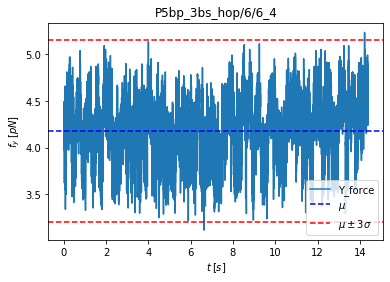

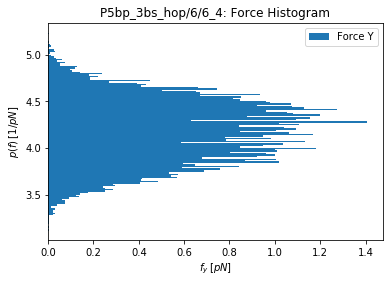

In [21]:
grafici = Graph_hop(dir_name, number, 4)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

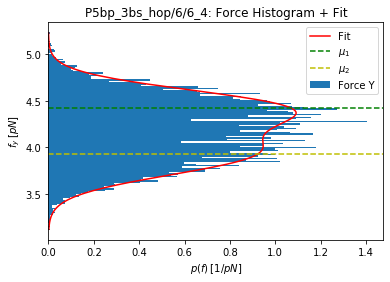

c_1 = 0.9844877657024682, mu_1 = 4.418828654467064, sigma_1 = 0.20327127649017437
c_2 = 0.8687040363919691, mu_2 = 3.9295053063192276, sigma_2 = 0.22862190558410134
sigma_c_1 = 0.058936884418489086, sigma_mu_1 = 0.02504713926388709, sigma_sigma_1 = 0.01720147413665291
sigma_c_2 = 0.05982869187585212, sigma_mu_2 = 0.03272862621368723, sigma_sigma_2 = 0.018038592236593133
w_U = 0.49782833744442406, sigma_w_U = 0.052535561557418085
w_N = 0.5016216496830896, sigma_w_N = 0.05160387509912479


In [22]:
prova = [1., 4.4, 0.1, 1., 4.1, 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [23]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

La molecola sta 7031 sec nello stato nativo e 6778 sec nello stato unfolded


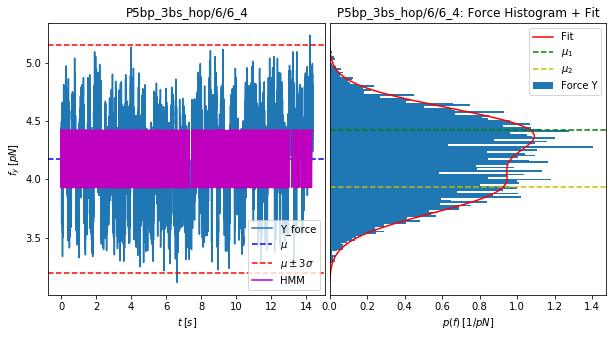

(7031, 6778)

In [24]:
grafici.subplots(fitting_par)

In [25]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,-0.2881,0.0975,208.69150,4.2926,0.00000
1,0.0190,0.2290,209.30840,4.2724,0.00390
2,-0.4068,0.3179,209.19315,4.1782,0.00586
3,-0.1136,0.2532,209.45170,4.2909,0.00586
4,-0.3230,0.1604,209.02210,4.3313,0.00683
...,...,...,...,...,...
13804,-0.2532,0.2329,208.77535,4.3465,14.38086
13805,-0.1206,0.0859,208.88685,4.6428,14.38183
13806,-0.0351,0.0299,208.88915,4.5535,14.38183
13807,-0.3544,0.0415,209.04850,4.4727,14.38379


# File 5

f media vale = 4.1869682192245605, con deviazione standard = 0.326420386563406


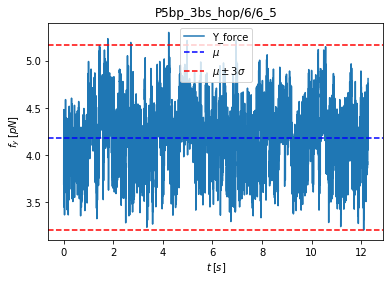

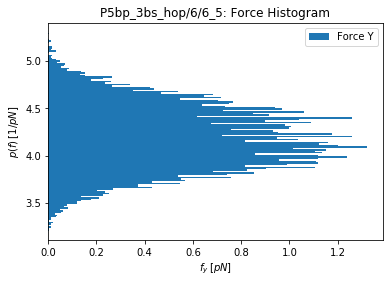

In [26]:
grafici = Graph_hop(dir_name, number, 5)
data_frame = grafici.do_graph()
# (2.0440e4+0.5+1.95e-3, 2.0442e4+1.-1.95e-3)

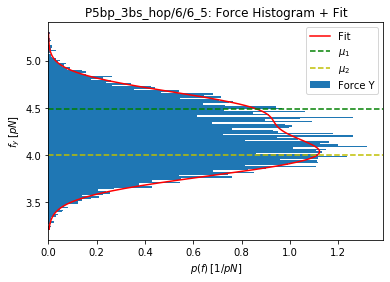

c_1 = 0.7552664573859748, mu_1 = 4.483334038203737, sigma_1 = 0.20268764948619736
c_2 = 1.0708789683231335, mu_2 = 3.999939294064811, sigma_2 = 0.22712393257851743
sigma_c_1 = 0.06013253948510674, sigma_mu_1 = 0.03295904688235364, sigma_sigma_1 = 0.022435584037951435
sigma_c_2 = 0.0619912204407902, sigma_mu_2 = 0.026754069955499227, sigma_sigma_2 = 0.014439151003752699
w_U = 0.6096677503232676, sigma_w_U = 0.03299273646102774
w_N = 0.38372263483652735, sigma_w_N = 0.08312824208683278


In [27]:
prova = [1., 4.5, 0.1, 1., 4., 0.1]
fitting_par, fitting_err, prob, err_prob = grafici.fit(guess=prova)
# (c1, mu1, sigma1, c2, mu2, sigma2)


In [28]:
forces_average.append(mean(fitting_par[1], fitting_par[4]))
forces_average_std.append(err_prop_mean(fitting_err[1], fitting_err[4]))
w_U.append(prob[0])
w_N.append(prob[1])
sigma_w_U.append(err_prob[0])
sigma_w_N.append(err_prob[1])

La molecola sta 4971 sec nello stato nativo e 6816 sec nello stato unfolded


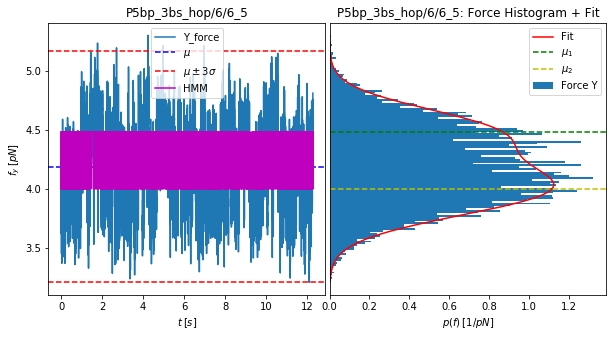

(4971, 6816)

In [29]:
grafici.subplots(fitting_par)

In [30]:
data_frame

,X_force,Z_force,lambda,Y_force,time(sec)
0,0.0609,-0.0301,203.16630,3.6934,0.00000
1,-0.4905,0.0473,202.91675,3.9358,0.00098
2,-0.1555,0.0473,203.58315,4.0031,0.00195
3,-0.5429,-0.0977,203.43050,3.8718,0.00293
4,-0.0613,-0.1441,203.23035,4.3061,0.00391
...,...,...,...,...,...
11782,-0.4958,-0.1499,202.69990,4.3768,12.27344
11783,-0.5394,-0.0649,202.86730,4.1580,12.27344
11784,-0.1904,-0.0610,202.75605,4.1714,12.27441
11785,-0.8256,-0.2389,202.29785,4.3128,12.27539


In [31]:
forces_average

[4.647214210348119, 4.053349249178474, 4.174166980393146, 4.241636666134275]

## Average of the average -> $\bar{f} = \frac{\mu_1 + \mu_2}{2}$

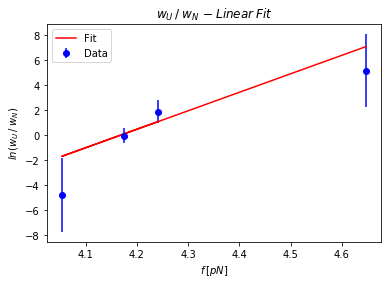

La forza di coesistenza vale f_c = 4.16714955234166, con sigma = 2.3258338167312194
La differenza di lunghezza tra lo stato foldend e unfolded è x_NU = -14.791701800913312, con sigma = 5.811759360623807
La differenza di energia libera DeltaG_NU = -61.63923353804723, con sigma = 24.434296990942247


In [32]:
x_NU, f_c, DeltaG_NU = grafici.deltaG(w_U, w_N, forces_average, sigma_w_U, sigma_w_N) 

In [33]:
G0 = grafici.G0(f_c[0])

DeltaG0 = -20.683705111688372, con sigma = None


# O sono due molecole diverse?

In [34]:
def remove_element(arr, pos):
    arr.pop(pos)
    return arr

In [35]:
# proviamo ad eliminare il pimo punto, quello più in alto
forces_average = remove_element(forces_average, 0)
w_U = remove_element(w_U, 0)
w_N = remove_element(w_N, 0)
sigma_w_U = remove_element(sigma_w_U, 0)
sigma_w_N = remove_element(sigma_w_N, 0)

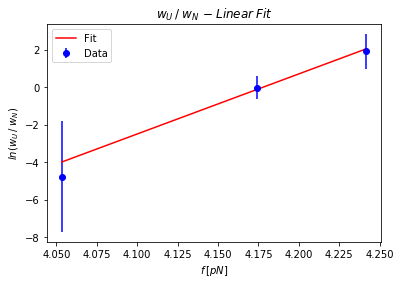

La forza di coesistenza vale f_c = 4.1780218187338685, con sigma = 2.383977200786904
La differenza di lunghezza tra lo stato foldend e unfolded è x_NU = -32.05142440632899, con sigma = 12.912214738667293
La differenza di energia libera DeltaG_NU = -133.91155049114175, con sigma = 54.112226996032724


In [36]:
x_NU, f_c, DeltaG_NU = grafici.deltaG(w_U, w_N, forces_average, sigma_w_U, sigma_w_N) 

In [37]:
f_c

(4.1780218187338685, 2.383977200786904)

In [38]:
G0 = grafici.G0(f_c[0])

DeltaG0 = -20.747130552809526, con sigma = None


In [39]:
# x_NU, f_c, DeltaG_NU = grafici.deltaG(w_U[3:], w_N[3:], forces_average[3:], sigma_w_U[3:], sigma_w_N[3:]) 